In [40]:
import pandas as pd
import sqlite3

In [41]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [47]:
query_views = """
select *
from pageviews
where uid like 'user_%'
"""

query_commits = """
select *
from checker
where uid like 'user_%'
"""

pv_users = pd.read_sql_query(query_views, conn, parse_dates=['datetime'])
ch_users = pd.read_sql_query(query_commits, conn, parse_dates=['timestamp'])

In [50]:
views = pv_users.groupby(by=pv_users['datetime'].dt.date).agg({'uid':['count']}).reset_index()
commits = ch_users.groupby(ch_users['timestamp'].dt.date).agg({'uid':['count']}).reset_index()

views.columns = ['date', 'views']
commits.columns = ['date', 'commits']

In [51]:
merged = pd.merge(views, commits, how='inner', on='date')

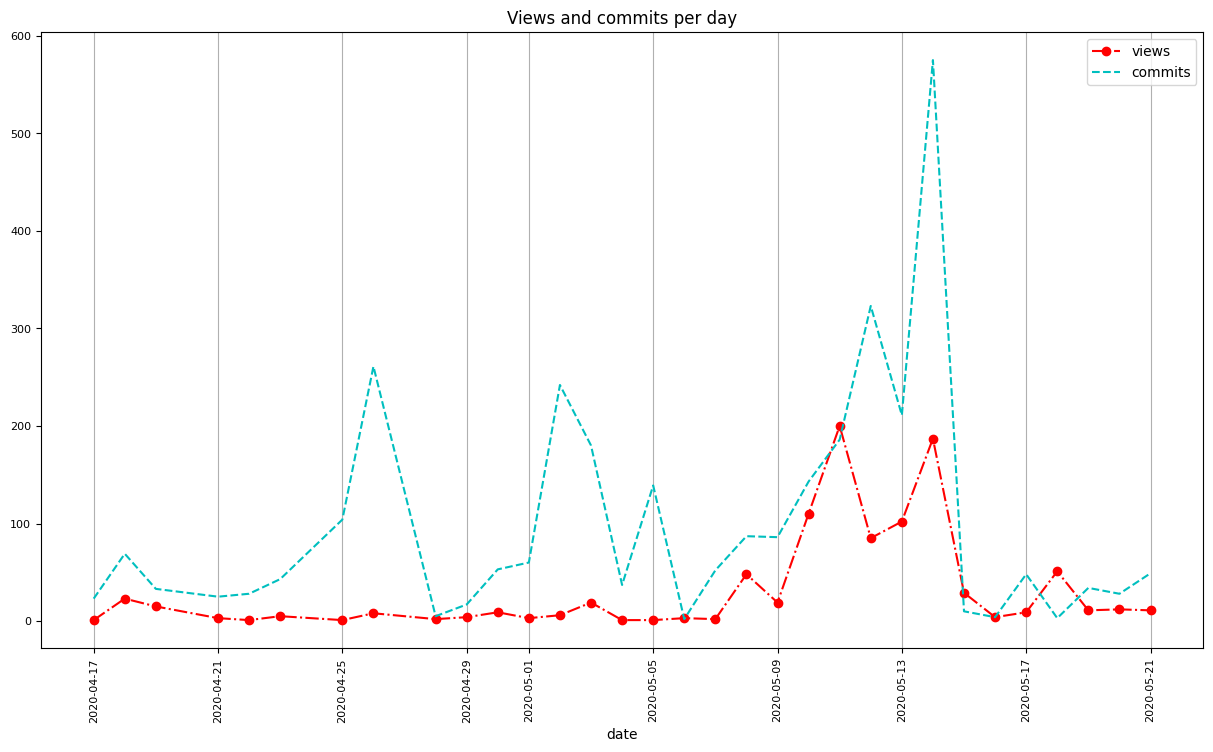

In [52]:
merged.plot(
    x='date',
    y=['views', 'commits'],
    style={'views':'r-.o', 'commits':'c--'},
    fontsize=8,
    figsize=(15,8),
    title='Views and commits per day',
    rot=90
).grid(axis='x')

In [54]:
merged[merged['views'] > 150].count()

date       2
views      2
commits    2
dtype: int64

In [7]:
conn.close()